-----


# Tom Croshaw
---

## Project 4: Notebook
### All code is run in Python 2

For web scraping please see project4_seek_scrape.ipynb

-----

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator.

Once you have collected and cleaned the data, you will use it to answer the two questions outlined above.

### Part 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds such as the median salary.

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. Communication of your process is key.

Note that most listings *DO NOT* come with salary information. Being to able extrapolate or predict the expected salaries for other listings is exactly why this model will be so valuable.

**Steps for Part 1:**

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from at least 1000 postings for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (Title, location, department, etc.).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author a report to your Principal detailing your analysis.


### Part 2: Factors that distinguish job category

Using the job postings you scraped for part 1, or potentially new job postings from a second round of scraping, identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering you do, and what your target variables are.

The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


**BONUS PROBLEM:**

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

Note that this requires framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Requirements

- Scrape and prepare your data using BeautifulSoup.

- **Create and compare at least two models for each section.**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing: Ridge, logistic regression, KNN, SVM, etc.
- A Jupyter Notebook with your analysis for a peer audience of data scientists. Make sure to clearly describe and label each section.
- A written report directed to your (non-technical!) Principal

 **Pro Tip:** You can find a good example report [here](https://www.dlsweb.rmit.edu.au/lsu/content/2_assessmenttasks/assess_tuts/reports_ll/report.pdf).

 **Pro Tip 2:** Scraping is one of the most fun, useful and interesting skills out there!  Don’t lose out by copying someone else.

___

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords # Import the stop word list
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

%matplotlib inline

### 1. Read in scraped data:

In [3]:
# Import webscraped job data from seek.com.au

job_data = pd.read_csv("./job_posts.csv")

In [4]:
job_data.head()

,title,company,locality,region,location,industry,job_type,body1,salary,date_posted,rating
0,Data Scientist and Lead Data Scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,NaN,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm",NaN
1,Data Scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,NaN,Latitude Financial Services is a leading consu...,NaN,"Today, 3:06pm",NaN
2,Data Engineer / Data Scientist,Motion Recruitment -,Sydney,NaN,Location: Sydney,Information & Communication Technology,NaN,Australian start up success story requires a d...,Start up culture,"Today, 3:56pm",NaN
3,Risk Analyst / Data Scientist,Compliance & Risk Management Recruitment -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,NaN,Compliance and Risk Management Recruitment is ...,"$100,000 - $130,000","Today, 9:47am",NaN
4,Data Scientist,NRMA Motoring & Services -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,NaN,"The NRMA was born to keep people moving, and w...",NaN,"Today, 8:42am",NaN


In [212]:
job_data.drop_duplicates(['title','company','locality','region','industry','salary'])

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,4_junior,4_manager,4_senior,4_spec,salary_period,salary_range,salary_max,salary_multiplier,salary_final,body_clean
0,data scientist and lead data scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NA,"Today, 5:43pm",1_syd,...,0,0,0,0,NA,[],1.0,1.0,1.0,multiple roles x data scientist x lead data sc...
1,data scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,Latitude Financial Services is a leading consu...,NA,"Today, 3:06pm",1_mel,...,0,0,0,0,NA,[],1.0,1.0,1.0,latitude financial services leading consumer f...
2,data engineer / data scientist,Motion Recruitment -,Sydney,NaN,Location: Sydney,Information & Communication Technology,Australian start up success story requires a d...,Start up culture,"Today, 3:56pm",1_syd,...,0,0,0,0,NA,[],1.0,1.0,1.0,australian start success story requires data s...
3,risk analyst / data scientist,Compliance & Risk Management Recruitment -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,Compliance and Risk Management Recruitment is ...,100000 - 130000,"Today, 9:47am",1_mel,...,0,0,0,0,NA,"[100000, 130000]",130000.0,1.0,130000.0,compliance risk management recruitment special...
4,data scientist,NRMA Motoring & Services -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,"The NRMA was born to keep people moving, and w...",NA,"Today, 8:42am",1_syd,...,0,0,0,0,NA,[],1.0,1.0,1.0,nrma born keep people moving nearly years visi...
5,data scientist - top 100 asx company,Opus Recruitment Solutions -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Science & Technology,DATA SCIENTIST - TOP 100 ASX COMPANY\n\n6-mont...,700 - 900 per day,8 May 2017,1_syd,...,0,0,0,0,day,"[700, 900]",900.0,249.0,224100.0,data scientist top asx company month contractp...
6,data scientist,Caltex Australia -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Science & Technology,"At Caltex, we’re with you all the way. We keep...",NA,8 May 2017,1_syd,...,0,0,0,0,NA,[],1.0,1.0,1.0,caltex way keep millions people moving every d...
7,data scientist - big 4 consulting,HCM Australia -,Melbourne,NaN,Location: Melbourne,Consulting & Strategy,Data Scientist - Big 4 Consulting\n\n\nConsult...,NA,8 May 2017,1_mel,...,0,0,0,0,NA,[],1.0,1.0,1.0,data scientist big consulting consulting work ...
8,"devops, full stack, data scientists, careers n...",Savvi -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Information & Communication Technology,"Devops, Full Stack, Data Scientists, Careers N...",NA,7 May 2017,1_mel,...,0,0,0,0,NA,[],1.0,1.0,1.0,devops full stack data scientists careers nigh...
9,data scientist - software engineer,Xpand Group Pty Ltd -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Science & Technology,Data Scientist - Software Engineer\n\r\nMy cli...,NA,5 May 2017,1_mel,...,0,0,0,0,NA,[],1.0,1.0,1.0,data scientist software engineer client web ba...


In [6]:
job_data.shape

(2904, 11)

In [7]:
# Print nulls in data

print (job_data.isnull().sum().sort_values(ascending=False))

rating         2904
job_type       2904
salary         1902
region          735
body1            55
date_posted       1
industry          1
location          1
locality          1
company           0
title             0
dtype: int64


In [8]:
# drop columns all-null columns

job_data.drop('rating',axis =1, inplace = True)
job_data.drop('job_type', axis = 1, inplace = True)
job_data.head()

,title,company,locality,region,location,industry,body1,salary,date_posted
0,Data Scientist and Lead Data Scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm"
1,Data Scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,Latitude Financial Services is a leading consu...,NaN,"Today, 3:06pm"
2,Data Engineer / Data Scientist,Motion Recruitment -,Sydney,NaN,Location: Sydney,Information & Communication Technology,Australian start up success story requires a d...,Start up culture,"Today, 3:56pm"
3,Risk Analyst / Data Scientist,Compliance & Risk Management Recruitment -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,Compliance and Risk Management Recruitment is ...,"$100,000 - $130,000","Today, 9:47am"
4,Data Scientist,NRMA Motoring & Services -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,"The NRMA was born to keep people moving, and w...",NaN,"Today, 8:42am"


In [9]:
job_data.tail()

,title,company,locality,region,location,industry,body1,salary,date_posted
2899,PLEXOS Analyst,Energy Exemplar -,Adelaide,NaN,Location: Adelaide,Science & Technology,"""We have a passion for problem solving and tur...",NaN,"Today, 11:50am"
2900,Lead PLEXOS Analyst,Energy Exemplar -,Adelaide,NaN,Location: Adelaide,Science & Technology,"""We have a passion for problem solving and tur...",NaN,"Today, 11:48am"
2901,Transport Analyst - ANZ,Johnson & Johnson -,Sydney,Ryde & Macquarie Park,Location: Sydney Ryde & Macquarie Park,"Manufacturing, Transport & Logistics",Newly Created\r\nrole Permanent\r\nopportu...,NaN,"Today, 11:25am"
2902,EL1 Workforce Analyst,Hays Human Resources -,ACT,NaN,Location: ACT,Human Resources & Recruitment,Passionate about HR Policy - Great stakeholder...,NaN,"Today, 12:57pm"
2903,Research Programmer | Data Analyst | Media Foc...,CCInternational Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,Looking for a smart and creative Researcher an...,"$70,000 - $85,000",1 May 2017


### *Location Columns Preparation:*
Mapping locations to a variable and converting to dummies

In [10]:
# check all locations in job list

job_data['locality'].value_counts()

Sydney                                  1427
Melbourne                                660
Brisbane                                 285
ACT                                      216
Perth                                    128
Adelaide                                  64
Newcastle, Maitland & Hunter              16
Gosford & Central Coast                   16
Gold Coast                                14
Geelong & Great Ocean Road                11
Cairns & Far North                         9
Hobart                                     6
Port Macquarie & Mid North Coast           5
Wollongong, Illawarra & South Coast        4
Townsville & Northern QLD                  4
Sunshine Coast                             3
Bendigo, Goldfields & Macedon Ranges       3
Toowoomba & Darling Downs                  3
Blue Mountains & Central West              3
Mackay & Coalfields                        2
Dubbo & Central NSW                        2
Devonport & North West                     2
Mildura & 

In [11]:
location_dict = {'Sydney':"1_syd",'Melbourne':"1_mel", 'Brisbane':"1_bri",'Perth':"1_per",'Adelaide':"1_ade"
                ,'Newcastle, Maitland & Hunter':"1_new"
                ,'Gosford & Central Coast':"1_gos",'Gold Coast':"1_gc",'Geelong & Great Ocean Road':"1_gee"
                ,'Cairns & Far North':"1_cai",'Hobart':"1_hob"
                ,'Port Macquarie & Mid North Coast':"1_ptm",'Wollongong, Illawarra & South Coast':"1_wol"}

job_data['loc_val'] = job_data['locality'].map(location_dict)

# fill with 0 as a regional indicator
job_data['loc_val'] = job_data['loc_val'].fillna("1_other")

print job_data.head()

                                    title  \
0  Data Scientist and Lead Data Scientist   
1                          Data Scientist   
2          Data Engineer / Data Scientist   
3           Risk Analyst / Data Scientist   
4                          Data Scientist   

                                      company   locality  \
0                     Clicks IT Recruitment -     Sydney   
1               Latitude Financial Services -  Melbourne   
2                        Motion Recruitment -     Sydney   
3  Compliance & Risk Management Recruitment -  Melbourne   
4                  NRMA Motoring & Services -     Sydney   

                               region  \
0   CBD, Inner West & Eastern Suburbs   
1                 CBD & Inner Suburbs   
2                                 NaN   
3                 CBD & Inner Suburbs   
4   CBD, Inner West & Eastern Suburbs   

                                            location  \
0  Location: Sydney CBD, Inner West & Eastern Sub...   
1        

In [12]:
# Create dummies for locations

loc_val_dummies = pd.get_dummies(job_data['loc_val'])

# Join the dummy variables to the main dataframe:

job_data = pd.concat([job_data, loc_val_dummies], axis=1)

# Drop MiscFeature column and one of the MiscFeature categories ('other'):

job_data = job_data.drop('1_other', 1)
job_data.head()

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,1_gc,1_gee,1_gos,1_hob,1_mel,1_new,1_per,1_ptm,1_syd,1_wol
0,Data Scientist and Lead Data Scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm",1_syd,...,0,0,0,0,0,0,0,0,1,0
1,Data Scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,Latitude Financial Services is a leading consu...,NaN,"Today, 3:06pm",1_mel,...,0,0,0,0,1,0,0,0,0,0
2,Data Engineer / Data Scientist,Motion Recruitment -,Sydney,NaN,Location: Sydney,Information & Communication Technology,Australian start up success story requires a d...,Start up culture,"Today, 3:56pm",1_syd,...,0,0,0,0,0,0,0,0,1,0
3,Risk Analyst / Data Scientist,Compliance & Risk Management Recruitment -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,Compliance and Risk Management Recruitment is ...,"$100,000 - $130,000","Today, 9:47am",1_mel,...,0,0,0,0,1,0,0,0,0,0
4,Data Scientist,NRMA Motoring & Services -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,"The NRMA was born to keep people moving, and w...",NaN,"Today, 8:42am",1_syd,...,0,0,0,0,0,0,0,0,1,0


### *Industry Columns Preparation:*
Mapping industry values to a variable and converting to dummies

In [13]:
job_data['industry'].value_counts()

Information & Communication Technology    2046
Accounting                                 210
Banking & Financial Services               157
Consulting & Strategy                       99
Science & Technology                        81
Marketing & Communications                  73
Government & Defence                        65
Insurance & Superannuation                  21
Education & Training                        20
Sales                                       19
Healthcare & Medical                        18
Manufacturing, Transport & Logistics        17
Administration & Office Support             17
Human Resources & Recruitment               13
Engineering                                  9
Mining, Resources & Energy                   8
Real Estate & Property                       6
Call Centre & Customer Service               5
Retail & Consumer Products                   5
Advertising, Arts & Media                    3
Design & Architecture                        3
Community Ser

In [14]:
industry_dict = {'Information & Communication Technology':'2_ICT'
                 ,'Accounting':'2_accounting'
                 ,'Banking & Financial Services':'2_BFS'
                 ,'Consulting & Strategy':'2_ConsStrat'
                 ,'Science & Technology':'2_SciTech'
                 ,'Marketing & Communications':'2_MarkComms'
                 ,'Government & Defence':'2_Gov'
                 ,'Insurance & Superannuation':'2_InsurSuper'
                 ,'Education & Training':'2_Education'
                 ,'Sales':'2_Sales'
                 ,'Healthcare & Medical':'2_health'
                 ,'Manufacturing, Transport & Logistics':'2_manufacturing'
                 ,'Administration & Office Support':'2_admin'
                 ,'Human Resources & Recruitment':'2_HR'
                 ,'Engineering':'2_engineering','Mining, Resources & Energy':'2_miningEnergy'
                 ,'Real Estate & Property':'2_property'
                 ,'Call Centre & Customer Service':'2_customerS'
                 ,'Retail & Consumer Products':'2_retail'
                 ,'Advertising, Arts & Media':'2_media'
                 ,'Design & Architecture':'2_architecture'
                 ,'Community Services & Development':'2_csd'
                 ,'Legal':'2_legal'
                 ,'Farming, Animals & Conservation':'2_farming'
                 ,'Construction':'2_construct'
                 ,'CEO & General Management':'2_management'}

job_data['industry_val'] = job_data['industry'].map(industry_dict)
job_data['industry_val'] =job_data['industry_val'].fillna('2_other')
job_data.head(1)

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,1_gee,1_gos,1_hob,1_mel,1_new,1_per,1_ptm,1_syd,1_wol,industry_val
0,Data Scientist and Lead Data Scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm",1_syd,...,0,0,0,0,0,0,0,1,0,2_ICT


In [15]:
# Create dummies for locations

industry_val_dummies = pd.get_dummies(job_data['industry_val'])

# Join the dummy variables to the main dataframe:

job_data = pd.concat([job_data, industry_val_dummies], axis=1)

# Drop MiscFeature column and one of the MiscFeature categories ('other'):

job_data = job_data.drop('2_other', 1)
job_data.head(1)

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,2_engineering,2_farming,2_health,2_legal,2_management,2_manufacturing,2_media,2_miningEnergy,2_property,2_retail
0,Data Scientist and Lead Data Scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm",1_syd,...,0,0,0,0,0,0,0,0,0,0


### Job Type

In [16]:
job_data['title'].value_counts(20)

Business Analyst                                                                 0.102273
Senior Business Analyst                                                          0.034091
Data Analyst                                                                     0.022383
Data Scientist                                                                   0.016529
Technical Business Analyst                                                       0.010331
Business Systems Analyst                                                         0.008264
Digital Business Analyst                                                         0.004821
Business Analysts                                                                0.004821
Business Process Analyst                                                         0.004477
Agile Business Analyst                                                           0.004132
Salesforce Business Analyst                                                      0.003788
Senior Dat

In [17]:
job_data["title_val"] = '3_other'
job_data["title"] = job_data['title'].str.lower()
job_data["title"] = job_data["title"].fillna('NA')
job_data.ix[job_data["title"].str.contains('data scientist', na=False),"title_val"] = '3_ds'
job_data.ix[job_data["title"].str.contains('data analyst', na=False),"title_val"] = '3_da'
job_data.ix[job_data["title"].str.contains('research analyst', na=False),"title_val"] = '3_ra'
job_data.ix[job_data["title"].str.contains('business analyst', na=False),"title_val"] = '3_ba'
job_data.ix[job_data["title"].str.contains('business intelligence', na=False),"title_val"] = '3_bi'
job_data[['title','title_val']].head(4)

,title,title_val
0,data scientist and lead data scientist,3_ds
1,data scientist,3_ds
2,data engineer / data scientist,3_ds
3,risk analyst / data scientist,3_ds


In [18]:
# Create dummies for locations

title_val_dummies = pd.get_dummies(job_data['title_val'])

# Join the dummy variables to the main dataframe:

job_data = pd.concat([job_data, title_val_dummies], axis=1)

# Drop MiscFeature column and one of the MiscFeature categories ('other'):

job_data = job_data.drop('3_other', 1)
job_data.head(1)

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,2_media,2_miningEnergy,2_property,2_retail,title_val,3_ba,3_bi,3_da,3_ds,3_ra
0,data scientist and lead data scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm",1_syd,...,0,0,0,0,3_ds,0,0,0,1,0


In [19]:
job_data["seniority_val"] = '4_other'
job_data["title"] = job_data['title'].str.lower()
job_data.ix[job_data["title"].str.contains('junior'),"seniority_val"] = '4_junior'
job_data.ix[job_data["title"].str.contains('senior'),"seniority_val"] = '4_senior'
job_data.ix[job_data["title"].str.contains('manager'),"seniority_val"] = '4_manager'
job_data.ix[job_data["title"].str.contains('specialist'),"seniority_val"] = '4_spec'

In [20]:
# Create dummies for locations

senior_val_dummies = pd.get_dummies(job_data['seniority_val'])

# Join the dummy variables to the main dataframe:

job_data = pd.concat([job_data, senior_val_dummies], axis=1)

# Drop MiscFeature column and one of the MiscFeature categories ('other'):

job_data = job_data.drop('4_other', 1)
job_data.head(1)

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,3_ba,3_bi,3_da,3_ds,3_ra,seniority_val,4_junior,4_manager,4_senior,4_spec
0,data scientist and lead data scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm",1_syd,...,0,0,0,1,0,4_other,0,0,0,0


### Salary

In [21]:
# some targeted cleaning of salary information to make parsing easier:
job_data["salary"] = job_data["salary"].str.replace("p.a", "year")
job_data["salary"] = job_data["salary"].str.replace("p.d", "day")
job_data["salary"] = job_data["salary"].str.replace("p.h", "hour")
job_data["salary"] = job_data["salary"].str.replace("p.m", "month")
job_data["salary"] = job_data["salary"].str.replace("\n", "")
job_data["salary"] = job_data["salary"].str.replace(",", "")
job_data["salary"] = job_data["salary"].str.replace("$", "")
job_data["salary"] = job_data["salary"].str.replace("/", "")
job_data["salary"] = job_data["salary"].str.replace("+", "")
job_data["salary"] = job_data["salary"].str.replace("k", "000")
job_data["salary"] = job_data["salary"].str.replace("K", "000")
job_data["salary"] = job_data["salary"].str.replace("to", "-")
job_data["salary"]

0                                               NaN
1                                               NaN
2                                  Start up culture
3                                   100000 - 130000
4                                               NaN
5                                 700 - 900 per day
6                                               NaN
7                                               NaN
8                                               NaN
9                                               NaN
10                                150-160000  Super
11                                              NaN
12                                              NaN
13                                  120000 - 130000
14                               900 - 1200 per day
15                     100000 - 140000 year.  Super
16                     150000 - 180000 year.  Super
17                                              NaN
18      Enjoy wor000ing  in a flexible environment!
19      Enjo

In [22]:
job_data["salary_period"] = np.nan
# if the salary contains information on time period, save that time period string in the salary_period column
# idea of creating a payment freuqency column sourced from Michael Salmon on medium.com blog
job_data["salary"] = job_data["salary"].fillna('NA')
job_data.ix[job_data["salary"].str.contains("year"),"salary_period"] = "year"
job_data.ix[job_data["salary"].str.contains("month"),"salary_period"] = "month"
job_data.ix[job_data["salary"].str.contains("week"),"salary_period"] = "week"
job_data.ix[job_data["salary"].str.contains("day"),"salary_period"] = "day"
job_data.ix[job_data["salary"].str.contains("hour"),"salary_period"] = "hour"
job_data

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,3_bi,3_da,3_ds,3_ra,seniority_val,4_junior,4_manager,4_senior,4_spec,salary_period
0,data scientist and lead data scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NA,"Today, 5:43pm",1_syd,...,0,0,1,0,4_other,0,0,0,0,NaN
1,data scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,Latitude Financial Services is a leading consu...,NA,"Today, 3:06pm",1_mel,...,0,0,1,0,4_other,0,0,0,0,NaN
2,data engineer / data scientist,Motion Recruitment -,Sydney,NaN,Location: Sydney,Information & Communication Technology,Australian start up success story requires a d...,Start up culture,"Today, 3:56pm",1_syd,...,0,0,1,0,4_other,0,0,0,0,NaN
3,risk analyst / data scientist,Compliance & Risk Management Recruitment -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,Compliance and Risk Management Recruitment is ...,100000 - 130000,"Today, 9:47am",1_mel,...,0,0,1,0,4_other,0,0,0,0,NaN
4,data scientist,NRMA Motoring & Services -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,"The NRMA was born to keep people moving, and w...",NA,"Today, 8:42am",1_syd,...,0,0,1,0,4_other,0,0,0,0,NaN
5,data scientist - top 100 asx company,Opus Recruitment Solutions -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Science & Technology,DATA SCIENTIST - TOP 100 ASX COMPANY\n\n6-mont...,700 - 900 per day,8 May 2017,1_syd,...,0,0,1,0,4_other,0,0,0,0,day
6,data scientist,Caltex Australia -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Science & Technology,"At Caltex, we’re with you all the way. We keep...",NA,8 May 2017,1_syd,...,0,0,1,0,4_other,0,0,0,0,NaN
7,data scientist - big 4 consulting,HCM Australia -,Melbourne,NaN,Location: Melbourne,Consulting & Strategy,Data Scientist - Big 4 Consulting\n\n\nConsult...,NA,8 May 2017,1_mel,...,0,0,1,0,4_other,0,0,0,0,NaN
8,"devops, full stack, data scientists, careers n...",Savvi -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Information & Communication Technology,"Devops, Full Stack, Data Scientists, Careers N...",NA,7 May 2017,1_mel,...,0,0,1,0,4_other,0,0,0,0,NaN
9,data scientist - software engineer,Xpand Group Pty Ltd -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Science & Technology,Data Scientist - Software Engineer\n\r\nMy cli...,NA,5 May 2017,1_mel,...,0,0,1,0,4_other,0,0,0,0,NaN


In [23]:
job_data["salary_range"] = [re.findall('\d+', s) for s in job_data["salary"]]
job_data["salary_range"]

0                     []
1                     []
2                     []
3       [100000, 130000]
4                     []
5             [700, 900]
6                     []
7                     []
8                     []
9                     []
10         [150, 160000]
11                    []
12                    []
13      [120000, 130000]
14           [900, 1200]
15      [100000, 140000]
16      [150000, 180000]
17                    []
18                 [000]
19                 [000]
20                    []
21                    []
22                    []
23      [100000, 130000]
24                    []
25            [700, 900]
26                    []
27                    []
28                    []
29                    []
              ...       
2874                  []
2875                  []
2876                  []
2877      [60000, 70000]
2878                  []
2879                  []
2880      [70000, 85000]
2881                  []
2882                  []


In [24]:
salary_max = []
for salary in job_data["salary_range"]:
    if len(salary) > 0:
        salary_max.append(float(max(salary)))
    else:
        salary_max.append(1)
        
print len(salary_max)

2904


In [25]:
salary_max_df = pd.Series(salary_max,name='salary_max')

print salary_max_df.head()

job_data = job_data.join(salary_max_df)
job_data.head()

0         1.0
1         1.0
2         1.0
3    130000.0
4         1.0
Name: salary_max, dtype: float64


,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,3_ds,3_ra,seniority_val,4_junior,4_manager,4_senior,4_spec,salary_period,salary_range,salary_max
0,data scientist and lead data scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NA,"Today, 5:43pm",1_syd,...,1,0,4_other,0,0,0,0,NaN,[],1.0
1,data scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,Latitude Financial Services is a leading consu...,NA,"Today, 3:06pm",1_mel,...,1,0,4_other,0,0,0,0,NaN,[],1.0
2,data engineer / data scientist,Motion Recruitment -,Sydney,NaN,Location: Sydney,Information & Communication Technology,Australian start up success story requires a d...,Start up culture,"Today, 3:56pm",1_syd,...,1,0,4_other,0,0,0,0,NaN,[],1.0
3,risk analyst / data scientist,Compliance & Risk Management Recruitment -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,Compliance and Risk Management Recruitment is ...,100000 - 130000,"Today, 9:47am",1_mel,...,1,0,4_other,0,0,0,0,NaN,"[100000, 130000]",130000.0
4,data scientist,NRMA Motoring & Services -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,"The NRMA was born to keep people moving, and w...",NA,"Today, 8:42am",1_syd,...,1,0,4_other,0,0,0,0,NaN,[],1.0


In [26]:
# Annualise wages
job_data["salary_multiplier"] = 1
job_data["salary_period"] = job_data["salary_period"].fillna('NA')
job_data.ix[job_data["salary_period"].str.contains("year"),"salary_multiplier"] = 1.0
job_data.ix[job_data["salary_period"].str.contains("month"),"salary_multiplier"] = 12.0
job_data.ix[job_data["salary_period"].str.contains("week"),"salary_multiplier"] = 48.0
job_data.ix[job_data["salary_period"].str.contains("day"),"salary_multiplier"] = 249.0
job_data.ix[job_data["salary_period"].str.contains("hour"),"salary_multiplier"] = 1992.0

In [27]:
job_data.dtypes

title                 object
company               object
locality              object
region                object
location              object
industry              object
body1                 object
salary                object
date_posted           object
loc_val               object
1_ade                  uint8
1_bri                  uint8
1_cai                  uint8
1_gc                   uint8
1_gee                  uint8
1_gos                  uint8
1_hob                  uint8
1_mel                  uint8
1_new                  uint8
1_per                  uint8
1_ptm                  uint8
1_syd                  uint8
1_wol                  uint8
industry_val          object
2_BFS                  uint8
2_ConsStrat            uint8
2_Education            uint8
2_Gov                  uint8
2_HR                   uint8
2_ICT                  uint8
                      ...   
2_admin                uint8
2_architecture         uint8
2_construct            uint8
2_csd         

In [28]:
# Calculate final wage
job_data['salary_max'] = job_data["salary_max"].fillna('1')
job_data['salary_final'] = job_data['salary_max'] * job_data['salary_multiplier']
job_data.salary_final.replace(1.0,0.0)
job_data.head()

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,seniority_val,4_junior,4_manager,4_senior,4_spec,salary_period,salary_range,salary_max,salary_multiplier,salary_final
0,data scientist and lead data scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NA,"Today, 5:43pm",1_syd,...,4_other,0,0,0,0,NA,[],1.0,1.0,1.0
1,data scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,Latitude Financial Services is a leading consu...,NA,"Today, 3:06pm",1_mel,...,4_other,0,0,0,0,NA,[],1.0,1.0,1.0
2,data engineer / data scientist,Motion Recruitment -,Sydney,NaN,Location: Sydney,Information & Communication Technology,Australian start up success story requires a d...,Start up culture,"Today, 3:56pm",1_syd,...,4_other,0,0,0,0,NA,[],1.0,1.0,1.0
3,risk analyst / data scientist,Compliance & Risk Management Recruitment -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,Compliance and Risk Management Recruitment is ...,100000 - 130000,"Today, 9:47am",1_mel,...,4_other,0,0,0,0,NA,"[100000, 130000]",130000.0,1.0,130000.0
4,data scientist,NRMA Motoring & Services -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,"The NRMA was born to keep people moving, and w...",NA,"Today, 8:42am",1_syd,...,4_other,0,0,0,0,NA,[],1.0,1.0,1.0


### Cleaning Body Text

In [29]:
# Function taken from my Capstone Part-02 and

def clean_text(body):

    #Remove links from body
    link_remove = re.sub(r"http\S+", "", str(body))
    
    #Remove non-letters from body    
    letters = re.sub("[^a-zA-Z]", " ", link_remove) 
    
    #Convert to lower case, split into individual words
    words = letters.lower().split()                             
    
    #Tip from, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    #Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    #Join the words back into one string separated by space and return the result.
    return (" ".join(meaningful_words))

In [30]:
clean_body_text = []

for row in job_data['body1']:
    clean_body_text.append(clean_text(row))

clean_body_text[0]

'multiple roles x data scientist x lead data scientist sydney cbd salary negotiable currently recruiting data scientist work client sydney cbd position responsible implementing analytical solutions process include analytical business transformation focusing customer product logistics warehousing inventory responsibilities utilise statistical tools create descriptive analytics creating business caseable design develop deliver predictive analytical models ideally retail industry must experience customer segmentation forecasting demand supply experience industry happy speak manage various processes assigned projectsperform data quality control assurance handle quality issuesable apply visual analysis techniques using different toolsets etl qualifications bachelors degree business technology industry equivalentprevious experience etl sdlcable identify approach appropriate process includes data collection sampling data processing manipulation experience delivering unit testsexperience using

In [31]:
job_data['body_clean'] = clean_body_text
job_data.head(2)

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,4_junior,4_manager,4_senior,4_spec,salary_period,salary_range,salary_max,salary_multiplier,salary_final,body_clean
0,data scientist and lead data scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NA,"Today, 5:43pm",1_syd,...,0,0,0,0,NA,[],1.0,1.0,1.0,multiple roles x data scientist x lead data sc...
1,data scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,Latitude Financial Services is a leading consu...,NA,"Today, 3:06pm",1_mel,...,0,0,0,0,NA,[],1.0,1.0,1.0,latitude financial services leading consumer f...


In [32]:
print ("Creating words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None,stop_words = None,max_features = 10000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_body_text)

# Fit cvec and converting the result to a DataFrame.
words_df = pd.DataFrame(vectorizer.transform(clean_body_text).todense(), columns=vectorizer.get_feature_names())

print (words_df.shape)

words_df.fillna(0)
words_df.sum().nlargest(100)
words_df.head()

Creating words...

(2904, 10000)


,aarconsultinggroup,ab,abadilla,abap,abapdata,abappscd,abas,abby,abigail,abilities,...,yow,yrs,zealand,zend,zenexus,zero,zinfra,zone,zones,zookeeper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
skills = ['r','r.','c++', 'python', 'java', 'ruby', 'javascript', 'data',
        'matlab', 'scala', 'excel', 'tableau', 'd3.js', 'sas','html','d3',
        'hadoop', 'mapreduce','spark', 'pig', 'hive', 'shark','stats',
        'zookeeper', 'flume', 'sql', 'nosql',
        'mongodb', 'aws', 'unstructured', 'structured',
        'structured', 'curiosity','communication','munging',
        'learning', 'calculus', 'algebra', 'statistics', 'visualization',
        'engineering', 'maths', 'design',
        'development', 'administration', 'management','research',
        'data mining', 'modeling', 'predictive',
        'b.i.', 'business intelligence', 'optimization', 'mining','science'
        'cloud', 'viz ', 'statistics',
        'analysis', 'n.l.p', 'nlp',
        'simulation', 'simulations', 'classification', 'clustering','regression',
        'entrepreneurial', 'entrepreneur', 'team','systems','IT',
        'wrangling', 'storyteller', 'storytelling', 'hacking',
        'deep', 'network', 'neural', 'sci-kit',
        'pandas', 'numpy', 'bi', 'knime', 'octave', 'rapidminer', 'xlstat', '@risk',
        'probability', 'dato', 'ggplot', 'ggvis', 'word', 'powerpoint', 'studio','management','analyst',
        'presentation','writing']

word_list = words_df.columns

filter_list = [x for x in word_list if x in skills]
for item in filter_list:
    print item

administration
analysis
analyst
aws
bi
classification
clustering
communication
curiosity
data
deep
design
development
engineering
entrepreneur
entrepreneurial
excel
flume
hacking
hadoop
hive
html
java
javascript
learning
management
mapreduce
maths
matlab
mining
modeling
mongodb
network
neural
nlp
nosql
numpy
optimization
pandas
pig
powerpoint
predictive
presentation
python
rapidminer
regression
research
ruby
sas
scala
simulation
simulations
spark
sql
statistics
stats
structured
studio
systems
tableau
team
unstructured
visualization
word
wrangling
writing
zookeeper


In [34]:
skills_df = words_df[['python', 'java', 'ruby', 'javascript', 'data',
        'matlab', 'scala', 'excel', 'tableau', 'sas','html',
        'hadoop', 'mapreduce','spark', 'pig', 'hive', 'stats',
        'zookeeper', 'flume', 'sql', 'nosql',
        'mongodb', 'aws', 'unstructured',
        'structured', 'curiosity','communication',
        'learning', 'visualization',
        'engineering', 'maths', 'design',
        'development', 'administration', 'management','research',
        'modeling', 'predictive',
        'intelligence', 'optimization', 'mining','science',
        'cloud', 'statistics',
        'analysis', 'nlp',
        'simulation', 'simulations', 'classification', 'clustering','regression',
        'entrepreneurial', 'entrepreneur', 'team','systems',
        'wrangling','hacking',
        'deep', 'network', 'neural',
        'pandas', 'numpy', 'bi', 'rapidminer',
        'word', 'powerpoint', 'studio','ms',
        'presentation','writing',
        'bachelors','bachelor','masters','phd']]

print (skills_df.shape)
skills_df.head()

(2904, 74)


,python,java,ruby,javascript,data,matlab,scala,excel,tableau,sas,...,word,powerpoint,studio,ms,presentation,writing,bachelors,bachelor,masters,phd
0,0,0,0,0,6,0,0,0,1,2,...,1,0,0,1,0,0,1,0,0,0
1,1,0,0,0,8,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,9,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
job_data_final = pd.concat([job_data, skills_df], axis=1)
job_data_final.shape

(2904, 141)

In [36]:
job_data_final.isnull().sum().sort_values(ascending=False)

region             735
body1               55
locality             1
location             1
industry             1
date_posted          1
phd                  0
2_manufacturing      0
3_ba                 0
title_val            0
2_retail             0
2_property           0
2_miningEnergy       0
2_media              0
2_health             0
2_management         0
2_legal              0
3_da                 0
2_farming            0
2_engineering        0
2_customerS          0
3_bi                 0
seniority_val        0
3_ds                 0
3_ra                 0
2_construct          0
4_junior             0
4_manager            0
4_senior             0
4_spec               0
                  ... 
stats                0
hive                 0
pig                  0
spark                0
hadoop               0
modeling             0
html                 0
sas                  0
tableau              0
excel                0
scala                0
matlab               0
sql        

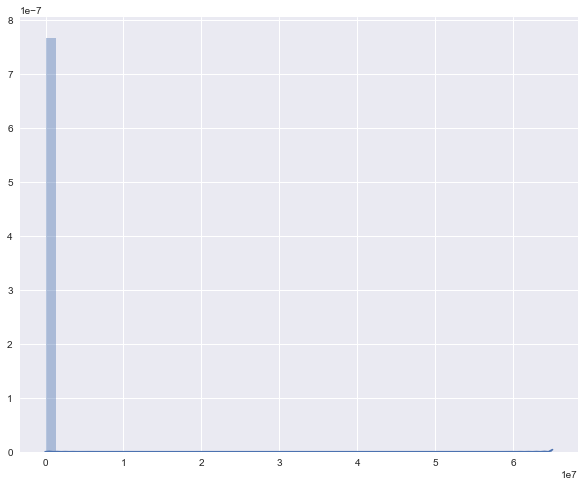

In [37]:
job_data_final = job_data_final[job_data_final['salary_final'] > 1]

salary_values = job_data_final['salary_final'].values

fig = plt.figure(figsize=(10, 8))
sns.distplot(salary_values)
plt.show()

727
250000.0


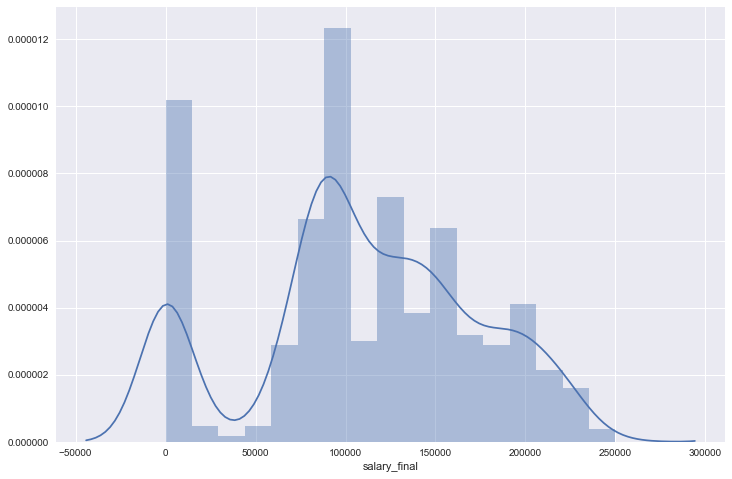

In [38]:
# Remove high outlier

# Calculate mean and std
mean = np.mean(job_data_final['salary_final'], axis=0)
sd = np.std(job_data_final['salary_final'], axis=0)

# Create list of friends count values to keep:
final_list = [x for x in job_data_final.salary_final if (x < mean + 1.5 * sd)]

# Filter hail data by friends counts to keep:
job_data_final = job_data_final.ix[(job_data_final['salary_final'].isin(final_list))]

# Check length of new dataframe and new max friends count
print (len(job_data_final))
print (job_data_final['salary_final'].max())

# > 1000 outliers removed

fig = plt.figure(figsize=(12, 8))
sns.distplot(job_data_final['salary_final'])

(619, 141)


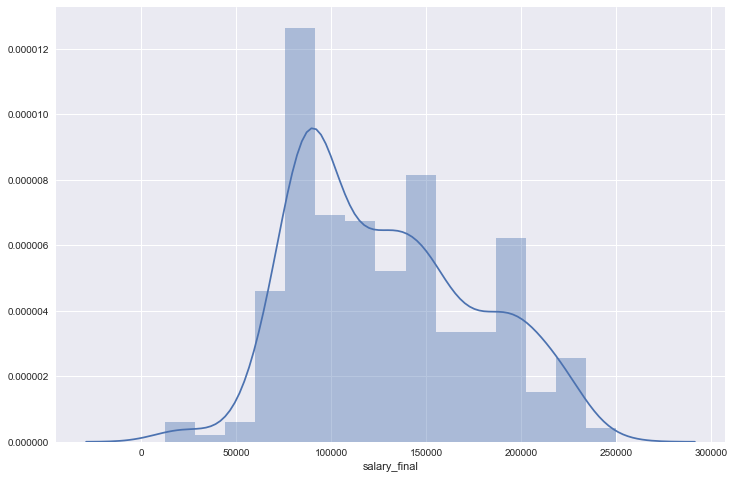

In [39]:
job_data_final = job_data_final[job_data_final['salary_final'] > 10000]

print job_data_final.shape

fig = plt.figure(figsize=(12, 8))
sns.distplot(job_data_final['salary_final'])

In [40]:
job_data_final.dtypes

title              object
company            object
locality           object
region             object
location           object
industry           object
body1              object
salary             object
date_posted        object
loc_val            object
1_ade               uint8
1_bri               uint8
1_cai               uint8
1_gc                uint8
1_gee               uint8
1_gos               uint8
1_hob               uint8
1_mel               uint8
1_new               uint8
1_per               uint8
1_ptm               uint8
1_syd               uint8
1_wol               uint8
industry_val       object
2_BFS               uint8
2_ConsStrat         uint8
2_Education         uint8
2_Gov               uint8
2_HR                uint8
2_ICT               uint8
                    ...  
analysis            int64
nlp                 int64
simulation          int64
simulations         int64
classification      int64
clustering          int64
regression          int64
entrepreneur

## Salary Predictor Modelling

I will perform 2 modelling exericses:
1. for main job info: location, industry, jobtype, seniority
2. for key skills


Firstly I will create the classifier target: High versus low salary to answer the question:
- Which features have the greatest importance when determining a low vs. high paying job?

I will assume a high paying job is anything over **$100,000.**

In [171]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

### Investigating impact on salary of "Overall Features" 

These include:
    - Location
    - Industry
    - Role (data scientist, data analyst, etc.)
    - Seniority (manager,junior, etc.)

In [154]:
# Dataframe of all overall (dummy) variables - location, industry, role, seniortiy

X_overall = job_data_final[['1_ade', '1_bri',
       '1_cai', '1_gc', '1_gee', '1_gos', '1_hob', '1_mel', '1_new',
       '1_per', '1_ptm', '1_syd', '1_wol', '2_BFS',
       '2_ConsStrat', '2_Education', '2_Gov', '2_HR', '2_ICT',
       '2_InsurSuper', '2_MarkComms', '2_Sales', '2_SciTech',
       '2_accounting', '2_admin', '2_architecture', '2_construct', '2_csd',
       '2_customerS', '2_engineering', '2_farming', '2_health', '2_legal',
       '2_management', '2_manufacturing', '2_media', '2_miningEnergy',
       '2_property', '2_retail', '3_ba', '3_bi', '3_da',
       '3_ds', '3_ra', '4_junior', '4_manager',
       '4_senior', '4_spec']]

In [155]:
# Standardise the X variables
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xs_overall = ss.fit_transform(X_overall)

### Linear Regression

Firstly I will perform a regression by using a Linear Model trained with Lasso. This will enable us to perform a regression model on the continuous salary target variable and identify the features (aka. predictors) of greatest importance.

In [156]:
# Set y variable:

y = job_data_final['salary_final']

In [169]:
# Perform Lasso Linnear Regression

# Lassco CV and git with predictors and salary target
optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1)
optimal_lasso.fit(Xs_overall, y)

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xs_overall, y, cv=5)

# Display the individual scores of each CV sampling method, and the average
print lasso_scores
print np.mean(lasso_scores)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[ 0.0967615   0.21734566  0.11653299  0.06848424  0.10717777]
0.121260430554


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [170]:
# Validate the LassoCV and investigate the predictor coefficients

lasso.fit(Xs_overall, y)
print lasso.score(Xs_overall, y)

lasso_coefs = pd.DataFrame({'variable':X_overall.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(10)

0.229162180185


,abs_coef,coef,variable
18,9041.860014,9041.860014,2_ICT
45,7940.213595,7940.213595,4_manager
46,7204.130299,7204.130299,4_senior
42,6734.868450,6734.868450,3_ds
13,4640.798193,4640.798193,2_BFS
23,4412.571333,-4412.571333,2_accounting
44,4004.510276,-4004.510276,4_junior
7,3861.268755,-3861.268755,1_mel
39,3727.393828,3727.393828,3_ba
3,2584.396114,-2584.396114,1_gc


#### Comment: 
The R^2 value is very low for this model so it does not appear that the overall variables can accurately predict the actual salary of the role well. That said, the variables with the greatest coefficients - managerial, senior roles and banking and ICT industries - do fall in line with general observations on weel paid roles.

Instead, we will reframe the problem into a **classification**.

----

### Classification Modelling

I will now invetsigate the overall variables as a classification of salary.

To do this I will create a new variable of high vs. low salaries, assumed to be:
    1. High Salary > $100,000
    2. Low Salary <= $100,000
    
The first step is to create this variable, then I will compare the accuracy scores of two models (Logisitc Regression and a Decision Tree Classifier) and compare feature within both to see which predictors are most important.

In [41]:
# Create a new X value for high vs low:
job_data_final['salary_lvh'] = 0

# Set >100000 as "high-paying" job
job_data_final.loc[job_data_final.salary_final > 100000, 'salary_lvh'] = 1

job_data_final['salary_lvh'].value_counts()

1    380
0    239
Name: salary_lvh, dtype: int64

In [42]:
job_data_final.columns.values

array(['title', 'company', 'locality', 'region', 'location', 'industry',
       'body1', 'salary', 'date_posted', 'loc_val', '1_ade', '1_bri',
       '1_cai', '1_gc', '1_gee', '1_gos', '1_hob', '1_mel', '1_new',
       '1_per', '1_ptm', '1_syd', '1_wol', 'industry_val', '2_BFS',
       '2_ConsStrat', '2_Education', '2_Gov', '2_HR', '2_ICT',
       '2_InsurSuper', '2_MarkComms', '2_Sales', '2_SciTech',
       '2_accounting', '2_admin', '2_architecture', '2_construct', '2_csd',
       '2_customerS', '2_engineering', '2_farming', '2_health', '2_legal',
       '2_management', '2_manufacturing', '2_media', '2_miningEnergy',
       '2_property', '2_retail', 'title_val', '3_ba', '3_bi', '3_da',
       '3_ds', '3_ra', 'seniority_val', '4_junior', '4_manager',
       '4_senior', '4_spec', 'salary_period', 'salary_range', 'salary_max',
       'salary_multiplier', 'salary_final', 'body_clean', u'python',
       u'java', u'ruby', u'javascript', u'data', u'matlab', u'scala',
       u'excel', u'tabl

## Decision Tree

In [174]:
# Set new variable for classification

y = job_data_final['salary_lvh']

In [175]:
dtc_params = {
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

dtc = DecisionTreeClassifier()
dtc_gs = GridSearchCV(dtc, dtc_params, cv=5, verbose=1, refit=True)

dtc_gs.fit(Xs_overall, y)

Fitting 5 folds for each of 847 candidates, totalling 4235 fits


[Parallel(n_jobs=1)]: Done 4235 out of 4235 | elapsed:   17.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [176]:
dtc_best = dtc_gs.best_estimator_
print dtc_gs.best_params_
print dtc_gs.best_score_

{'max_features': 5, 'min_samples_split': 5, 'max_depth': 7}
0.691437802908


In [177]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeClassifier(max_features='sqrt',min_samples_split=4,max_depth=7)

dtr.fit(X_overall, y)

dtr_scores = cross_val_score(dtr, X_overall, y, cv=5)
print dtr_scores
print (sum(dtr_scores)/len(dtr_scores))

[ 0.54032258  0.70967742  0.64516129  0.62903226  0.62601626]
0.63004196171


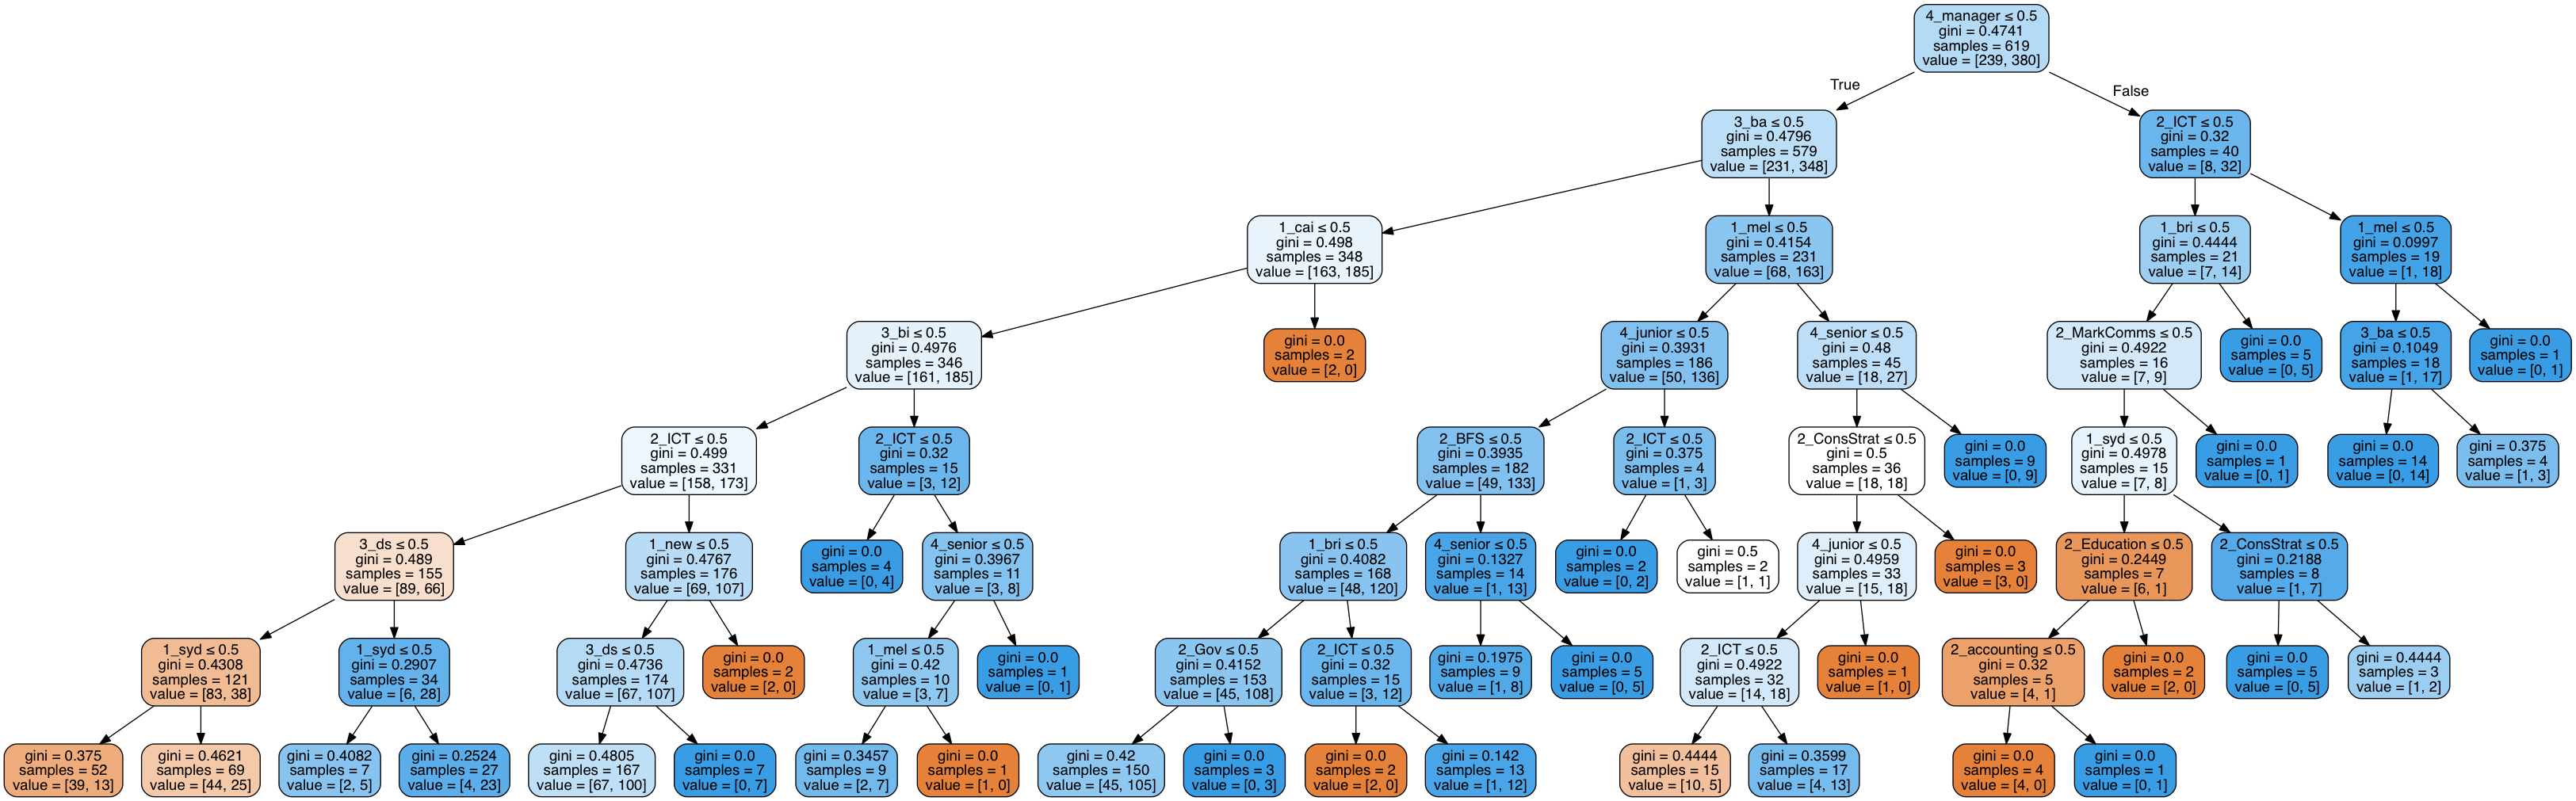

In [178]:
# Plot the final decision tree!

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_overall.columns)  


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [179]:
# Extract the top features

top_features = pd.DataFrame({
        'feature':X_overall.columns,
        'importance':dtc_best.feature_importances_})

top_features.sort_values('importance', ascending=False, inplace=True)
top_features.head(10)

,feature,importance
46,4_senior,0.292713
15,2_Education,0.139846
23,2_accounting,0.130170
1,1_bri,0.101338
44,4_junior,0.090405
11,1_syd,0.046440
24,2_admin,0.031594
14,2_ConsStrat,0.026170
21,2_Sales,0.023575
18,2_ICT,0.023368


#### Comment: 
The R^2 value is much improved compared to the regression model at **0.64**. This means that we can use the overall features to predict the high vs low jobs with greater accuracy than the specific salary amounts. The decision tree model suggests that of the modelled features, those of key importance are:

We will now invetsigate another classification model (linear regression) to see how its performance compares...

----

### Logistic Regression

In [180]:
# Set parameters for gridsearching
gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

# pass gridsearching with logistic regression and paarmeters
lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
print (lr_gridsearch)

lr_gridsearch.fit(Xs_overall, y)

# print optimal logreg scores and parameters
print lr_gridsearch.best_score_
print lr_gridsearch.best_params_

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.12332e-05, ...,   8.90215e-01,   1.00000e+00]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.683360258481
{'penalty': 'l2', 'C': 0.79248289835391694, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.8s finished


In [185]:
# export the R^2 scores and logreg coefficients

best_lr = lr_gridsearch.best_estimator_

print (best_lr.score(X_overall, y))

coef_df = pd.DataFrame({
        'coefficient':np.abs(best_lr.coef_[0]),
        'feature':X_overall.columns})

coef_df.sort('coefficient',ascending=False).head(10)

0.613893376414


/Users/tomcroshaw/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,coefficient,feature
46,0.686747,4_senior
42,0.649286,3_ds
45,0.607996,4_manager
3,0.429170,1_gc
4,0.409376,1_gee
39,0.407422,3_ba
18,0.371153,2_ICT
2,0.304417,1_cai
44,0.271640,4_junior
7,0.270526,1_mel


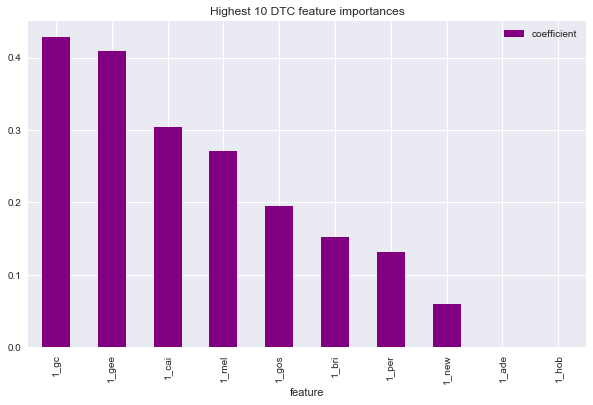

In [186]:
coef_df.head(10).sort_values('coefficient',ascending=False).plot(kind='bar',x='feature',figsize=(10,6),color='purple',title="Highest 10 DTC feature importances")

### Comment:
The R^2 value of the optimised logistic (gridsearched) log.regression model is similar to the decision tree model at 0.61. The logistic regression model suggests that of the modelled features, those of key importance are:

Using output from the two classification models, and to the lesser extent the linear regression model, we can now draw some conclusions to which overall featurs impact salary the most (see report at end of part 1).

## Job Skills and Key Words Investigation

### Linear (Lasso) Regression

In [191]:
# Set up new dataframe for only the skills and key words predictors

X_skills = job_data_final[['python','java', 'ruby', 'javascript', 'data', 'matlab', 'scala',
       'excel', 'tableau', 'sas', 'html', 'hadoop', 'mapreduce',
       'spark', 'pig', 'hive', 'stats', 'zookeeper', 'flume', 'sql',
       'nosql', 'mongodb', 'aws', 'unstructured', 'structured',
       'structured', 'curiosity', 'communication', 'learning',
       'statistics', 'visualization', 'engineering', 'maths',
       'design', 'development', 'administration', 
       'research', 'modeling', 'predictive', 'intelligence',
       'optimization', 'mining', 'science', 'cloud', 'statistics',
       'analysis', 'nlp', u'simulation', u'simulations',
       'classification', 'clustering', 'regression', 'entrepreneurial',
       'entrepreneur', 'team', 'systems', 'wrangling', 'hacking',
       'deep', 'network', 'neural', 'pandas', 'numpy', 'bi',
       'rapidminer', 'word', 'powerpoint', 'studio', 'management',
       'ms', 'presentation', 'writing', 'bachelors',
       'bachelor', u'masters', 'phd']]

Xs_skills = ss.fit_transform(X_skills)

In [192]:
# Perform Lasso Linnear Regression

# Lassco CV and git with predictors and salary target
optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1)
optimal_lasso.fit(Xs_skills, y)

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xs_skills, y, cv=5)

# Display the individual scores of each CV sampling method, and the average
print lasso_scores
print np.mean(lasso_scores)


# Validate the LassoCV with a lasso fit and investigate the predictor coefficients

lasso.fit(Xs_skills, y)

lasso_coefs = pd.DataFrame({'variable':X_skills.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(10)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[-0.00948746  0.17341511 -0.02691374  0.0784831   0.01793028]
0.0466854591367


...........................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished


,abs_coef,coef,variable
36,0.130788,-0.130788,research
65,0.052105,0.052105,word
7,0.043007,-0.043007,excel
27,0.040662,-0.040662,communication
26,0.036151,-0.036151,curiosity
33,0.034661,0.034661,design
75,0.031754,0.031754,phd
41,0.031350,0.031350,mining
0,0.028052,0.028052,python
34,0.027600,0.027600,development


**Comment:**

This model produces a very low R^2 score meaning it does not accurately predict the salary (at all!)

Let us reframe this problem as a classification to see if it improves...

----

### Decision Tree Classification

In [198]:
dtc_params = {
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

dtc_skills = DecisionTreeClassifier()
dtc_skills_gs = GridSearchCV(dtc_skills, dtc_params, cv=5, verbose=1, refit=True)

dtc_skills_gs.fit(Xs_skills, y)

dtc_skills_best = dtc_gs.best_estimator_
print dtc_skills_gs.best_params_
print dtc_skills_gs.best_score_

Fitting 5 folds for each of 847 candidates, totalling 4235 fits
{'max_features': 2, 'min_samples_split': 2, 'max_depth': None}
0.684975767367


[Parallel(n_jobs=1)]: Done 4235 out of 4235 | elapsed:   21.9s finished


In [199]:
# Validate the gridsearch and R^2

dtr_skills = DecisionTreeClassifier(max_features=5,min_samples_split=5,max_depth=None)

dtr_skills.fit(Xs_skills, y)

dtr_skills_scores = cross_val_score(dtr_skills, Xs_skills, y, cv=5)
print dtr_skills_scores
print (sum(dtr_skills_scores)/len(dtr_skills_scores))

[ 0.55645161  0.69354839  0.59677419  0.62903226  0.64227642]
0.623616574875


In [200]:
# Extract the top features

top_features = pd.DataFrame({
        'feature':X_skills.columns,
        'importance':dtc_best_skills.feature_importances_})

top_features.sort_values('importance', ascending=False, inplace=True)
top_features.head(20)

,feature,importance
36,research,0.475425
34,development,0.275350
19,sql,0.049376
52,entrepreneurial,0.033142
42,science,0.031456
70,presentation,0.031456
71,writing,0.027961
59,network,0.025173
74,masters,0.023205
10,html,0.022053


#### Comment: 
Similarly to the overall features modelling... the R^2 value is much improved compared to the regression model at **0.62**. This means that we can use the skills features to predict the high vs low jobs with greater accuracy than the specific salary amounts. The decision tree model suggests that of the modelled features, those of key importance are:

We will now invetsigate another classification model (linear regression) to see how its performance compares...

----

### Logistic Regression

In [201]:
# Logistic Regression Gridsearch

lr_gridsearch.fit(Xs_skills, y)

print lr_gridsearch.best_score_
print lr_gridsearch.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.667205169628
{'penalty': 'l1', 'C': 0.024201282647943811, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.9s finished


In [202]:
logreg = LogisticRegression(penalty='l1',C=0.024201282647943811,solver='liblinear')
logreg.fit(Xs_skills, y)

print 'Logreg intercept:', logreg.intercept_
print 'Logreg coef(s):', logreg.coef_

Logreg intercept: [ 0.18524346]
Logreg coef(s): [[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.         -0.29315933  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]]


In [203]:
best_lr_skills = lr_gridsearch.best_estimator_

print (best_lr_skills.score(Xs_skills, y))

coef_df = pd.DataFrame({
        'coefficient':np.abs(best_lr_skills.coef_[0]),
        'feature':X_skills.columns})

coef_df.sort('coefficient',ascending=False).head(10)

0.657512116317


/Users/tomcroshaw/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,coefficient,feature
36,0.293159,research
0,0.000000,python
48,0.000000,simulations
55,0.000000,systems
54,0.000000,team
53,0.000000,entrepreneur
52,0.000000,entrepreneurial
51,0.000000,regression
50,0.000000,clustering
49,0.000000,classification


### Comment:
The R^2 value of the optimised logistic (gridsearched) log.regression model is similar to the decision tree model at 0.65. However, the gridsearch suggests we use the lasso penalty parameter and, when doing so we are only left with one predictor - research!

I will now discuss the results of web scraping, NLP and modelling in a report...

## *Report: Investigation into what job attributes impact a salary*




---
## Part 02

Using the job postings you scraped for part 1, or potentially new job postings from a second round of scraping, identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

---
## Further Investigations:
### *'What makes a good data scientist?'* &  *'What skills do certain industries look for?'*

### Investigation 1: What skills and attributes of a job constitute a 'data scientist'?

In this analysis I will look at which locations, industries and key skills classify a 'data scientist'. My hypothesis is that key technical skills such as python, sql, will have be more important at classifying a data scientist role than location and industry... To do this I will:
1. Create a dataframe of the three types of precitors and a new y target of a binary classifier (1: data scientist, 0: not data scientist) and all other job types removed.
2. Perform decision tree and logistic regression classifications and evaluate the model performance and features.

In [204]:
#Setup data scientist predictors

ds_predictors = job_data_final[['1_ade', '1_bri',
       '1_cai', '1_gc', '1_gee', '1_gos', '1_hob', '1_mel', '1_new',
       '1_per', '1_ptm', '1_syd', '1_wol', '2_BFS',
       '2_ConsStrat', '2_Education', '2_Gov', '2_HR', '2_ICT',
       '2_InsurSuper', '2_MarkComms', '2_Sales', '2_SciTech',
       '2_accounting', '2_admin', '2_architecture', '2_construct', '2_csd',
       '2_customerS', '2_engineering', '2_farming', '2_health', '2_legal',
       '2_management', '2_manufacturing', '2_media', '2_miningEnergy',
       '2_property', '2_retail',
       'python','java', 'ruby', 'javascript', 'data', 'matlab', 'scala',
       'excel', 'tableau', 'sas', 'html', 'hadoop', 'mapreduce',
       'spark', 'pig', 'hive', 'stats', 'zookeeper', 'flume', 'sql',
       'nosql', 'mongodb', 'aws', 'unstructured',
       'structured', 'curiosity', 'communication', 'learning',
       'statistics', 'visualization', 'engineering', 'maths',
       'design', 'development', 'administration',
       'research', 'modeling', 'predictive', 'intelligence',
       'optimization', 'mining', 'science', 'cloud',
       'analysis', 'nlp', 'simulation', 'simulations',
       'classification', 'clustering', 'regression', 'entrepreneurial',
       'entrepreneur', 'team', 'systems', 'wrangling', 'hacking',
       'deep', 'network', 'neural', 'pandas', 'numpy', 'bi',
       'rapidminer', 'word', 'powerpoint', 'studio', 'management',
       'ms', 'presentation', 'writing', 'bachelors',
       'bachelor', 'masters', 'phd']]

Xs_ds_predictors = ss.fit_transform(ds_predictors)

# Set up data scientist target

y_ds = job_data_final['3_ds']

### Decision Tree Classification - *Data Scientist*

In [61]:
# Decision Tree gridsearch to get the optimal decision tree model

dtc_params = {
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()
dtc_gs = GridSearchCV(dtc, dtc_params, cv=5, verbose=1, refit=True)

dtc_gs.fit(Xs_ds_predictors, y_ds)

dtc_best = dtc_gs.best_estimator_

print dtc_gs.best_params_
print dtc_gs.best_score_

Fitting 5 folds for each of 847 candidates, totalling 4235 fits
{'max_features': 3, 'min_samples_split': 4, 'max_depth': 9}
0.970920840065


[Parallel(n_jobs=1)]: Done 4235 out of 4235 | elapsed:   22.4s finished


In [205]:
# Validate Decision tree model and R^2

dtr_ds = DecisionTreeClassifier(max_features=3,min_samples_split=3,max_depth=None)

dtr_ds.fit(Xs_ds_predictors, y_ds)

dtr_ds_scores = cross_val_score(dtr_ds, ds_predictors, y_ds, cv=5)

# Export scores of validated model

print dtr_ds_scores
print (sum(dtr_ds_scores)/len(dtr_ds_scores))

[ 0.808       1.          0.93548387  0.94308943  0.97560976]
0.932436611592


In [63]:
# Extract the top features from the decision tree classifier.

top_features = pd.DataFrame({
        'feature':ds_predictors.columns,
        'importance':dtr_ds.feature_importances_})

top_features.sort_values('importance', ascending=False, inplace=True)
top_features.head(10)

,feature,importance
80,science,0.121912
83,nlp,0.116320
39,python,0.082701
43,data,0.076165
72,development,0.071661
69,engineering,0.051658
52,spark,0.046023
66,learning,0.045516
67,statistics,0.034412
68,visualization,0.032953


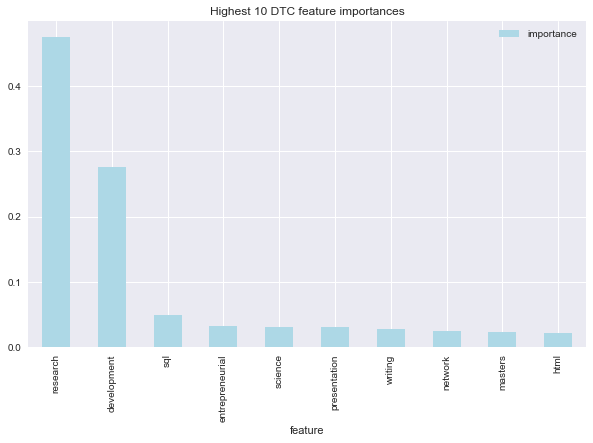

In [206]:
# Plot the top features

top_features.head(10).sort_values('importance',ascending=False).plot(kind='bar',x='feature',figsize=(10,6),color='lightblue',title="Highest 10 DTC feature importances")

---
### Logisitc Regression - *Data Scientist*

In [207]:
# Perform logreg gridsearch to find optimal model

lr_gridsearch.fit(Xs_ds_predictors, y_ds)

print lr_gridsearch.best_score_
print lr_gridsearch.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.956381260097
{'penalty': 'l1', 'C': 0.048626015800653531, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.7s finished


In [208]:
# Validate logistic regression model and R^2

logreg = LogisticRegression(penalty='l1',C=0.048626015800653531,solver='liblinear')
logreg.fit(Xs_ds_predictors, y_ds) # uses penalty of 11, which is Lasso (knocks out )

best_lr_skills = lr_gridsearch.best_estimator_

print (best_lr_skills.score(Xs_ds_predictors, y_ds))

coef_df = pd.DataFrame({
        'coefficient':np.abs(best_lr_skills.coef_[0]),
        'feature':ds_predictors.columns})

coef_df.sort('coefficient',ascending=False).head(10)

0.975767366721


/Users/tomcroshaw/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,coefficient,feature
39,0.448932,python
66,0.447127,learning
22,0.290363,2_SciTech
76,0.114939,predictive
43,0.102920,data
0,0.000000,1_ade
82,0.000000,analysis
81,0.000000,cloud
80,0.000000,science
79,0.000000,mining


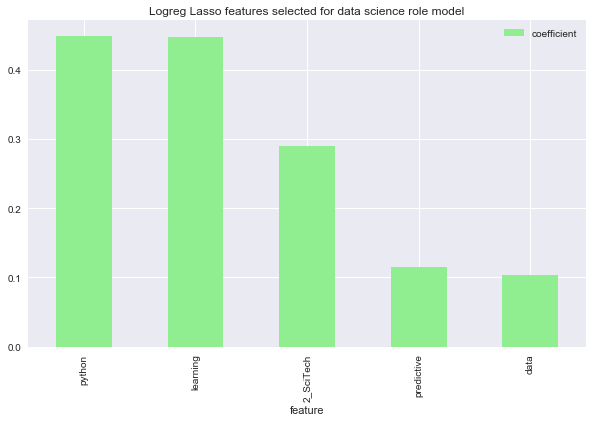

In [115]:
# Plot the remaining Lasso coefficients

coef_df[coef_df['coefficient'] != 0].sort_values('coefficient',ascending=False).plot(kind='bar',x='feature',
                                                                                    figsize=(10,6),color='lightgreen',
                                                                                    title="Logreg Lasso features selected for data science role model")

---
## Investigation 2: What skills and locations are most common in data and research jobs for key industries?

In this analysis I will look at which locations and key skills classify data and research jobs in certain industries. My hypothesis is that key technical skills such as python, sql, will have be more important at classifying a data scientist role than location... To do this I will:
1. Create a dataframe of the two types of precitors (location and skills/words) and a new y target of a multinomial classifier (different integers referring to different industries). Job types and seniority are not included in this analysis.
2. Perform logistic regression (multinomial) classification and a feature selection/knn analysis, then evaluate model performance and features.

In [66]:
# Create a classification dictionary for the 'industry' variable:

industry_classifier = {'Information & Communication Technology':1,'Accounting':2, 'Banking & Financial Services':3,
                       'Consulting & Strategy':4 ,'Science & Technology':5,'Marketing & Communications':6,
                       'Government & Defence':7 ,'Insurance & Superannuation':8,'Education & Training':9,'Sales':10}

# Map classifier dictionary to the industry variable and create the multinomial classification target
# I will only include the top-10 industries in this classification analysis

job_data_final['industry_class'] = job_data_final['industry'].map(industry_classifier)

# for all other variables I will set to a class of 0

job_data_final['industry_class'] = job_data_final['industry_class'].fillna(0)

# Check the industry mapping

print job_data_final[['industry','industry_class']].head(10)

                                  industry  industry_class
3             Banking & Financial Services             3.0
5                     Science & Technology             5.0
10                    Science & Technology             5.0
13  Information & Communication Technology             1.0
14  Information & Communication Technology             1.0
15            Banking & Financial Services             3.0
16              Insurance & Superannuation             8.0
23            Banking & Financial Services             3.0
25                    Science & Technology             5.0
30                    Science & Technology             5.0


In [67]:
# Create a dataframe of industry predictors (all location and key skill/word targets)

ind_predictors = job_data_final[['1_ade', '1_bri',
       '1_cai', '1_gc', '1_gee', '1_gos', '1_hob', '1_mel', '1_new',
       '1_per', '1_ptm', '1_syd', '1_wol',
       'python','java', 'ruby', 'javascript', 'data', 'matlab', 'scala',
       'excel', 'tableau', 'sas', 'html', 'hadoop', 'mapreduce',
       'spark', 'pig', 'hive', 'stats', 'zookeeper', 'flume', 'sql',
       'nosql', 'mongodb', 'aws', 'unstructured',
       'structured', 'curiosity', 'communication', 'learning',
       'statistics', 'visualization', 'engineering', 'maths',
       'design', 'development', 'administration', 'management',
       'research', 'modeling', 'predictive', 'intelligence',
       'optimization', 'mining', 'science', 'cloud',
       'analysis', 'nlp', 'simulation', 'simulations',
       'classification', 'clustering', 'regression', 'entrepreneurial',
       'entrepreneur', 'team', 'systems', 'wrangling', 'hacking',
       'deep', 'network', 'neural', 'pandas', 'numpy', 'bi',
       'rapidminer', 'word', 'powerpoint', 'studio', 'management',
       'ms', 'presentation', 'writing', 'bachelors',
       'bachelor', 'masters', 'phd']]

# Set industry class as target

y_ind = job_data_final['industry_class']

### Logistic Regression - *Industry*

In [68]:
# Perform gridsearch on logistic regression with industry variables/target

lr_gridsearch.fit(ind_predictors, y_ind)

print lr_gridsearch.best_score_
print lr_gridsearch.best_params_ # 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.633279483037
{'penalty': 'l2', 'C': 0.17475284000076829, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   12.4s finished


In [69]:
# export the coefficients from the best mode

best_lr_skills = lr_gridsearch.best_estimator_

# create a dataframe of the predictors and the logreg coefficients:

df_classi = pd.DataFrame(np.abs(best_lr_skills.coef_))
df_classi.columns = ind_predictors.columns
industry_class_name = ['Other','ICT','Accounting', 'Banking_FS',
                       'Consulting_Strategy' ,'Science_Technology','Marketing',
                       'Government' ,'Insurance','Education','Sales']
df_class_transpose = pd.DataFrame.transpose(df_classi)
df_class_transpose.columns = industry_class_name

df_class_transpose.head()

,Other,ICT,Accounting,Banking_FS,Consulting_Strategy,Science_Technology,Marketing,Government,Insurance,Education,Sales
1_ade,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1_bri,0.182550,0.423472,0.090716,0.413350,0.418835,0.185068,0.142786,0.331526,0.143534,0.241642,0.189648
1_cai,0.129190,0.180227,0.096139,0.064767,0.057340,0.058565,0.041215,0.098593,0.043221,0.048552,0.021816
1_gc,0.096463,0.037407,0.020394,0.015472,0.020458,0.109912,0.216959,0.063922,0.059232,0.145325,0.012994
1_gee,0.042186,0.075610,0.027440,0.047549,0.024178,0.074198,0.016509,0.067211,0.013057,0.020924,0.006699


excel         0.841505
research      0.547417
java          0.518688
structured    0.517756
sas           0.500186
science       0.484597
systems       0.484023
1_bri         0.423472
statistics    0.404251
cloud         0.369011
Name: ICT, dtype: float64


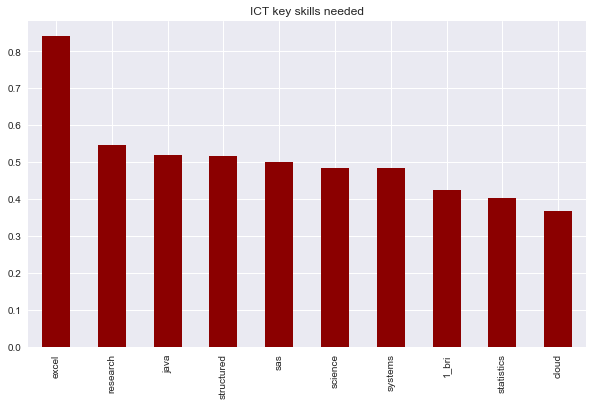

In [125]:
# Print and plot coefficients for ICT

print df_class_transpose['ICT'].nlargest(10)
df_class_transpose['ICT'].nlargest(10).sort_values(ascending=False).plot(kind='bar',
                                                                         x='feature',
                                                                         figsize=(10,6),
                                                                         color='darkred',
                                                                         title="ICT key skills needed")

excel            0.877202
sql              0.740001
communication    0.555018
1_syd            0.540870
writing          0.425750
design           0.418418
mining           0.333764
science          0.299742
cloud            0.294366
engineering      0.293990
Name: Accounting, dtype: float64


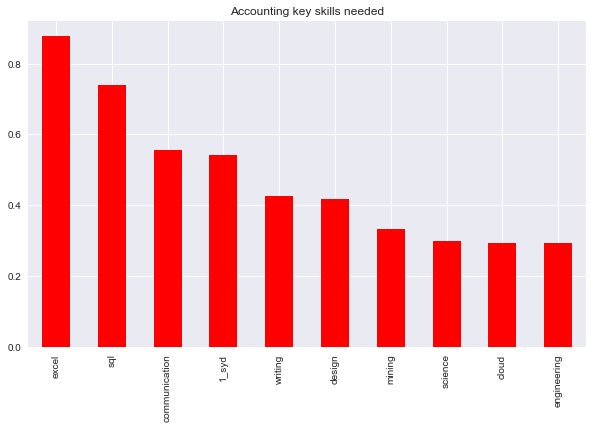

In [126]:
# Print and plot coefficients for Accounting

print df_class_transpose['Accounting'].nlargest(10)
df_class_transpose['Accounting'].nlargest(10).sort_values(ascending=False).plot(kind='bar',
                                                                         x='feature',
                                                                         figsize=(10,6),
                                                                         color='red',
                                                                         title="Accounting key skills needed")

masters          0.523746
communication    0.484253
ms               0.427230
1_bri            0.413350
predictive       0.412007
phd              0.364922
bi               0.309380
research         0.294709
systems          0.288400
science          0.283793
Name: Banking_FS, dtype: float64


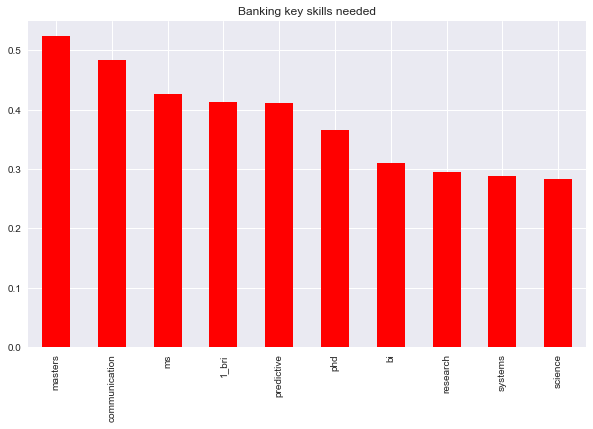

In [127]:
# Print and plot coefficients for Banking and Financial Services

print df_class_transpose['Banking_FS'].nlargest(10)
df_class_transpose['Banking_FS'].nlargest(10).sort_values(ascending=False).plot(kind='bar',
                                                                         x='feature',
                                                                         figsize=(10,6),
                                                                         color='red',
                                                                         title="Banking key skills needed")

**Comment:** The logistic regression model has a R^2 of 0.63, which is reasonable. Excel is a dominant feature in classifying ICT and accounting, whereas Banking and Finance require Masters degrees (typical!)

### KNN Classification - *Industry*

I will now perform a Chi2 feature selection to observe the indepence of variables. I will then run this through a KNN classification model to see if this algorithm performs better than the logistic regression...

In [209]:
# Perform a CHI2

from sklearn.feature_selection import SelectKBest, chi2

# build the selector (we'll build one with each score type)
skb_chi2 = SelectKBest(chi2, k=5)

# train the selector on our data
skb_chi2.fit(ind_predictors, y_ind)

# examine results
kbest = pd.DataFrame([ind_predictors.columns, list(skb_chi2.scores_)], 
                     index=['feature','chi2 score']).T.sort_values('chi2 score', ascending=False)
kbest

,feature,chi2 score
49,research,1461.91
55,science,761.983
45,design,388.872
43,engineering,346.065
22,sas,334.265
17,data,279.993
40,learning,264.231
41,statistics,234.887
33,nosql,182.7
53,optimization,180.162


In [210]:
# I willuse the chi2 variables >100 in my KNN model

x_industry_chi2 = job_data_final[['research','science','design','engineering','sas','data','learning',
                                  'statistics','nosql','optimization','python','neural','sql','nlp','modeling',
                                  'hadoop','systems']]

Xs_industry_chi2 = ss.fit_transform(x_industry_chi2)

In [211]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
# Gridsearch the optimal knn model using the chi2 industry x and y

knn_params = {
    'n_neighbors':[1,3,5,9,15,21],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']}

knn_gridsearch = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1)  

knn_gridsearch.fit(Xs_industry_chi2, y_ind)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 9, 15, 21], 'metric': ['euclidean', 'manhattan'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [141]:
# best cross validation score achieved
print "CV score:", knn_gridsearch.best_score_ 

# best knn parameters
print knn_gridsearch.best_params_ 

# calling best estimator
best_knn = knn_gridsearch.best_estimator_ 

# baseline accuracy of industry predictors and target
print "Baseline accuracy:", best_knn.score(Xs_industry_chi2, y_ind)

CV score: 0.609046849758
{'n_neighbors': 15, 'metric': 'euclidean', 'weights': 'distance'}
Baseline accuracy: 0.773828756058


A slightly lower R^2 score than the Logisitc Regression but it is still a reasonable output. Reducing the chi2 acceptance value and including greater variables would potentially increase this model performance...

## Part 02 - Initial Report Addendum - Data Science role and Industry Investigations